In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt
import time
from os import listdir

In [ ]:
def crop_imgs(set_name, add_pixels_value=0):
    """
    Finds the extreme points on the image and crops the rectangular out of them
    """
    set_new = []
    for img in set_name:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        # threshold the image, then perform a series of erosions +
        # dilations to remove any small regions of noise
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        # find contours in thresholded image, then grab the largest one
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        # find the extreme points
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        ADD_PIXELS = add_pixels_value
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        set_new.append(new_img)
    return np.array(set_new)

In [ ]:
img = cv2.imread('/content/Br35H Brain Tumor Detection 2020/dataset/yes/y98.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

# find contours in thresholded image, then grab the largest one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# find the extreme points
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

# add contour on the image
img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 255), 4)

# add extreme points
img_pnt = cv2.circle(img_cnt.copy(), extLeft, 18, (0, 0, 255), -1)
img_pnt = cv2.circle(img_pnt, extRight, 18, (0, 255, 0), -1)
img_pnt = cv2.circle(img_pnt, extTop, 18, (255, 0, 0), -1)
img_pnt = cv2.circle(img_pnt, extBot, 18, (255, 255, 0), -1)

# crop
ADD_PIXELS = -3
new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()

Text(0.5, 1.0, 'Step 4. Crop the Image')

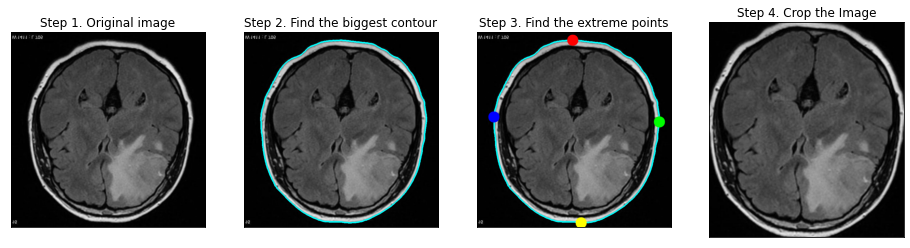

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(141)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Step 1. Original image')
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 2. Find the biggest contour')
plt.subplot(143)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 3. Find the extreme points')
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.title('Step 4. Crop the Image')

([], <a list of 0 Text major ticklabel objects>)

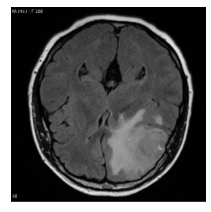

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(141)
plt.imshow(img)
plt.xticks([])
plt.yticks([])


([], <a list of 0 Text major ticklabel objects>)

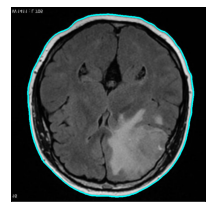

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

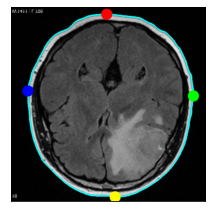

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(142)
plt.imshow(img_pnt)
plt.xticks([])
plt.yticks([])

([], <a list of 0 Text major ticklabel objects>)

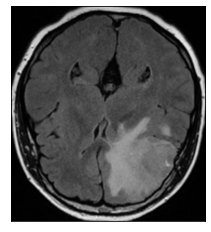

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])

In [ ]:
#@ Gaussian Blur :
# Gaussian Blur filter smooths an image by averaging pixel values with its neighbors. 
# It's called a Gaussian Blur because the average has a Gaussian falloff effect. 
# In other words, pixels that are closer to the target pixel have a higher impact with the average than pixels that are far away. 

#@@ Dilation and Erosion : 
# here are two operations that look to expand or contract the foreground pixels of an image to help remove or accentuate small pixel details, such as speckles. 
# They work by sliding a kernel template, a small square, across an image
# The Dilation effect works to turn black pixels, or background pixels, into white pixels, while an erosion filter looks to turn white pixels into black pixels, essentially eating away at the foreground. 
# The small structuring element that was moved across the image is called the kernel and defines where and how to mark a pixel changed by that filter.

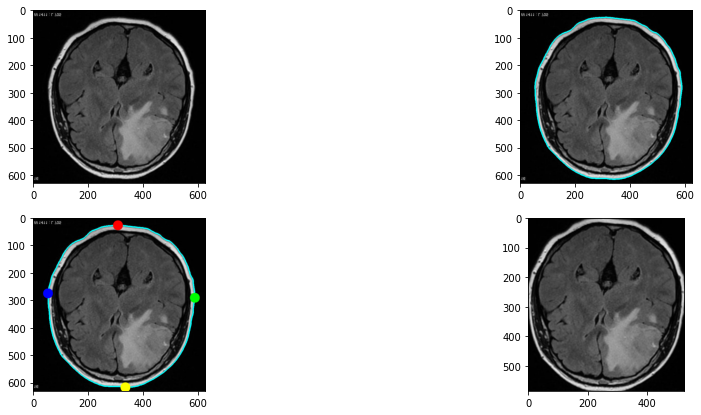

In [ ]:
plt.figure(figsize=(16,7))
plt.subplot(2,2,1)
plt.imshow(img)

plt.subplot(2,2,2)
plt.imshow(img_cnt)

plt.subplot(2,2,3)
plt.imshow(img_pnt)

plt.subplot(2,2,4)
plt.imshow(new_img)
